# Recommendation System Exercise 1


Import Packages

In [1]:
# For lecture
%run liblecture.py

In [2]:
# import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import other packages
import datetime
import random
import math

Load csv data as DataFrame

In [3]:
df = pd.read_csv('ratings.csv')

Check shape and columns of the DataFrame.

See examples rows at the head and tail.

In [4]:
df.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
df.tail(5)

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [6]:
print(df.shape)
print(df.columns)

#1:
(100004, 4)


#2:
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')




In [7]:
df[['userId', 'movieId', 'rating']].iloc[10:15]

,userId,movieId,rating
10,1,1371,2.5
11,1,1405,1.0
12,1,1953,4.0
13,1,2105,4.0
14,1,2150,3.0


Convert timestamp as datetime.datetime and add year column.

In [8]:
pd.to_datetime(df['timestamp'].astype(int), unit = 's').head()

0   2009-12-14 02:52:24
1   2009-12-14 02:52:59
2   2009-12-14 02:53:02
3   2009-12-14 02:53:05
4   2009-12-14 02:53:25
Name: timestamp, dtype: datetime64[ns]

In [9]:
df['date'] = pd.to_datetime(df['timestamp'].astype(int), unit = 's').astype(datetime.datetime)
df['year'] = df['date'].apply(lambda x: x.year)
df.head()

,userId,movieId,rating,timestamp,date,year
0,1,31,2.5,1260759144,2009-12-14 02:52:24,2009
1,1,1029,3.0,1260759179,2009-12-14 02:52:59,2009
2,1,1061,3.0,1260759182,2009-12-14 02:53:02,2009
3,1,1129,2.0,1260759185,2009-12-14 02:53:05,2009
4,1,1172,4.0,1260759205,2009-12-14 02:53:25,2009


Count ratings per year and show a bar chart.

In [10]:
yearCounts = df.groupby('year').size() 
#yearCounts = df.groupby('year').count()[['userId']]
#yearCounts.columns = ['counts']
yearCounts

year
1995        3
1996     6239
1997     3294
1998     1825
1999     5901
2000    13869
2001     4658
2002     3938
2003     4462
2004     4658
2005     7161
2006     7493
2007     1548
2008     3676
2009     3434
2010     2518
2011     4450
2012     3849
2013     1969
2014     2224
2015     6610
2016     6225
dtype: int64

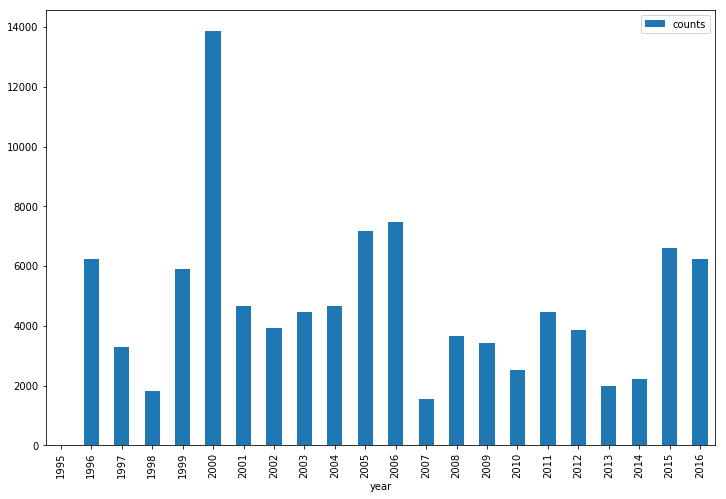

In [11]:
yearCounts.plot(kind='bar', figsize=(12,8), label='counts', legend=True)
plt.show()

Divide rating data into train and test data.

In [12]:
#df['type'] = 'train'
#df['type'] = df['type'].apply(lambda x: ('train', 'test')[random.random() <= 0.1])
#train = df[df['type'] == 'train']
#test = df[df['type'] == 'test']

train = df.sample(frac=0.9,random_state=1)
train['type'] = 'train'
train.head()

,userId,movieId,rating,timestamp,date,year,type
99778,667,446,4.0,847271818,1996-11-06 09:16:58,1996,train
16170,104,71135,3.5,1446674062,2015-11-04 21:54:22,2015,train
3521,19,1394,5.0,855192061,1997-02-06 01:21:01,1997,train
55070,395,671,5.0,953007109,2000-03-14 04:11:49,2000,train
25477,187,953,3.0,1230361942,2008-12-27 07:12:22,2008,train


In [13]:
#test = df.loc[~df.index.isin(train.index)]
test = df.drop(train.index)
test['type'] = 'test'
test.head()

,userId,movieId,rating,timestamp,date,year,type
9,1,1343,2.0,1260759131,2009-12-14 02:52:11,2009,test
15,1,2193,2.0,1260759198,2009-12-14 02:53:18,2009,test
18,1,2968,1.0,1260759200,2009-12-14 02:53:20,2009,test
27,2,110,4.0,835355532,1996-06-21 11:12:12,1996,test
47,2,273,4.0,835355779,1996-06-21 11:16:19,1996,test


Compute average rating of all users and assign it to the all predicted ratings.

In [14]:
avgRating = train['rating'].mean()
avgRating

3.5421147948980045

In [15]:
avgPred = test[['userId', 'movieId', 'rating']].copy()
avgPred['pred'] = avgRating
avgPred.head()

,userId,movieId,rating,pred
9,1,1343,2.0,3.54
15,1,2193,2.0,3.54
18,1,2968,1.0,3.54
27,2,110,4.0,3.54
47,2,273,4.0,3.54


Compute MAE and RMSE for the average rating prediction result.

In [16]:
avgPredErrors = avgPred['pred'] - avgPred['rating']
mae1 = avgPredErrors.abs().mean()
rmse1 = math.sqrt(avgPredErrors.abs().pow(2).mean())
print(" MAE1:", mae1)
print("RMSE1:", rmse1)

#4:
 MAE1: 0.858687450558


#5:
RMSE1: 1.0629409004509323




Compute average rating of each user and assign them to the predicted ratings of each user.

In [17]:
userAvgRatings = train[['userId','rating']].groupby('userId').agg('mean')
#userAvgRatings.rename(columns={'rating': 'pred'}, inplace=True)
userAvgRatings.columns = ['pred']
userAvgRatings['userId'] = userAvgRatings.index
userAvgRatings.head()

,pred,userId
userId,,
1,2.71,1
2,3.49,2
3,3.58,3
4,4.35,4
5,3.89,5


In [18]:
userAvgPred = test[['userId', 'movieId', 'rating']]
userAvgPred = pd.merge(userAvgPred, userAvgRatings, how='left', on=['userId'])
userAvgPred.info()
#userAvgPred['pred'] = userAvgPred['pred'].apply(lambda x: (x, avgRating)[math.isnan(x)])
userAvgPred[userAvgPred['pred'].isnull()] = avgRating
userAvgPred.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
userId     10000 non-null int64
movieId    10000 non-null int64
rating     10000 non-null float64
pred       10000 non-null float64
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


,userId,movieId,rating,pred
0,1.0,1343.0,2.0,2.71
1,1.0,2193.0,2.0,2.71
2,1.0,2968.0,1.0,2.71
3,2.0,110.0,4.0,3.49
4,2.0,273.0,4.0,3.49


Compute MAE and RMSE for the user average rating prediction result.

In [19]:
userAvgPredErrors = userAvgPred['pred'] - userAvgPred['rating']
mae2 = userAvgPredErrors.abs().mean()
rmse2 = math.sqrt(userAvgPredErrors.abs().pow(2).mean())
print(" MAE2:", mae2)
print("RMSE2:", rmse2)

#4:
 MAE2: 0.758163686063


#5:
RMSE2: 0.9652871605248908




Compute average rating of each item and assign them to the predicted ratings of each user on the item.

In [20]:
itemAvgRatings = train[['movieId','rating']].groupby('movieId').agg('mean')
itemAvgRatings.columns = ['pred']
itemAvgRatings['movieId'] = itemAvgRatings.index
itemAvgRatings.head()

,pred,movieId
movieId,,
1,3.87,1
2,3.44,2
3,3.20,3
4,2.39,4
5,3.29,5


In [21]:
itemAvgPred = test[['userId', 'movieId', 'rating']].copy()
itemAvgPred = pd.merge(itemAvgPred, itemAvgRatings, how='left', on=['movieId'])
itemAvgPred[itemAvgPred['pred'].isnull()] = avgRating
itemAvgPred.head()

,userId,movieId,rating,pred
0,1.0,1343.0,2.0,3.72
1,1.0,2193.0,2.0,3.17
2,1.0,2968.0,1.0,3.59
3,2.0,110.0,4.0,3.92
4,2.0,273.0,4.0,3.12


Compute MAE and RMSE for the user average rating prediction result.

In [22]:
itemAvgRatings = itemAvgPred['pred'] - itemAvgPred['rating']
mae3 = itemAvgRatings.abs().mean()
rmse3 = math.sqrt(itemAvgRatings.abs().pow(2).mean())
print(" MAE3:", mae3)
print("RMSE3:", rmse3)

#4:
 MAE3: 0.734661412354


#5:
RMSE3: 0.9574586472744426




Read movie data and see the poster of movies.

In [23]:
from IPython.display import Image, display
dfMovie = pd.read_csv('movies_w_imgurl.csv')
dfMovie.head()

,movieId,imdbId,title,genres,imgurl
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,https://images-na.ssl-images-amazon.com/images...
1,2,113497,Jumanji (1995),Adventure|Children|Fantasy,https://images-na.ssl-images-amazon.com/images...
2,3,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,4,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,5,113041,Father of the Bride Part II (1995),Comedy,https://images-na.ssl-images-amazon.com/images...


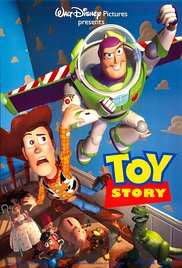

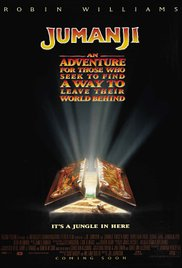

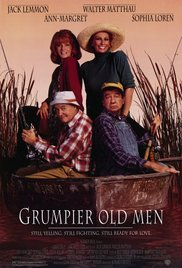

In [24]:
display(Image(dfMovie['imgurl'].iloc[0]))
display(Image(dfMovie['imgurl'].iloc[1]))
display(Image(dfMovie['imgurl'].iloc[2]))